<a href="https://colab.research.google.com/github/mmartigani/RoadMapIA/blob/main/64_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#REGRESION LINEAL

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.DataFrame()
df["Area"] = [2600,3000,3200,3600,4000]
df["Precio"] = [550000,565000,610000,680000,725000]

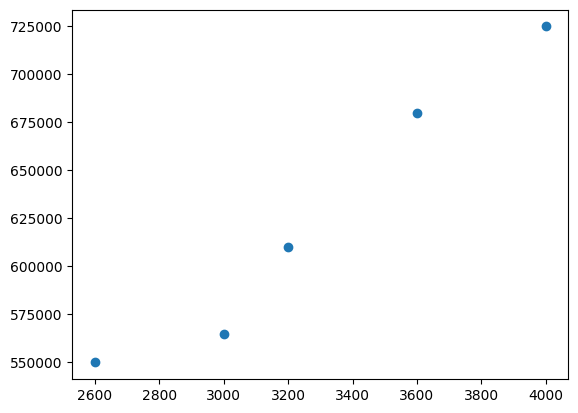

In [4]:
plt.scatter(df["Area"],
           df["Precio"]);

In [5]:
X = df[["Area"]]

In [7]:
y = df["Precio"]

In [8]:
modelo = linear_model.LinearRegression()

In [9]:
modelo.fit(X, y)

LinearRegression()

In [10]:
modelo.predict([[3300]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

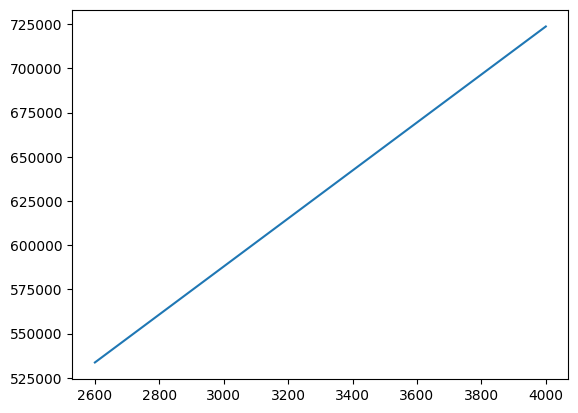

In [11]:
plt.plot(df["Area"],
        modelo.predict(X));

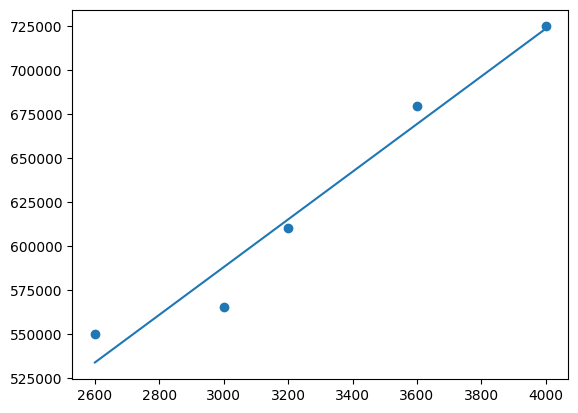

In [12]:
plt.scatter(df["Area"],
           df["Precio"])
plt.plot(df["Area"],
        modelo.predict(X));

In [13]:
#regresion logistica

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
ruta = "/content/datos_seguro.csv"
df = pd.read_csv(ruta)
df.head()

,edad,compra
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


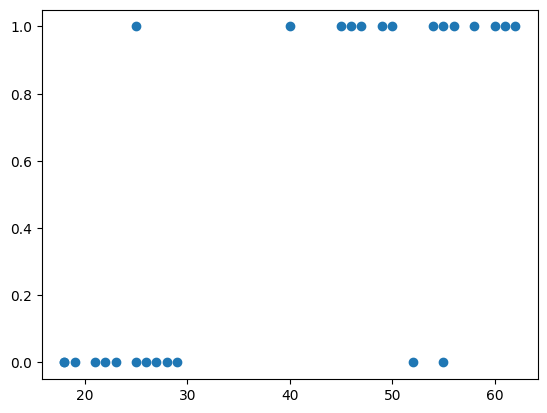

In [17]:
plt.scatter(df.edad,
           df.compra);

In [18]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(df[["edad"]], df["compra"], train_size=0.9)

In [19]:
X_entrena

,edad
1,25
3,52
8,62
17,58
7,60
9,61
23,45
10,18
16,25
20,21


In [20]:
X_prueba

,edad
22,40
4,46
18,19


In [21]:
modelo = LogisticRegression()

In [22]:
modelo.fit(X_entrena, y_entrena)

LogisticRegression()

In [23]:
modelo.score(X_entrena, y_entrena)

0.875

In [24]:
datos_nuevos = pd.DataFrame({"edad":[25, 35, 45, 55]})
datos_nuevos

,edad
0,25
1,35
2,45
3,55


In [25]:
probabilidades = modelo.predict_proba(datos_nuevos)
probabilidades

array([[0.88620039, 0.11379961],
       [0.67864443, 0.32135557],
       [0.36414792, 0.63585208],
       [0.13442813, 0.86557187]])

In [26]:
prob_compra = probabilidades[:, 1]
prob_compra

array([0.11379961, 0.32135557, 0.63585208, 0.86557187])

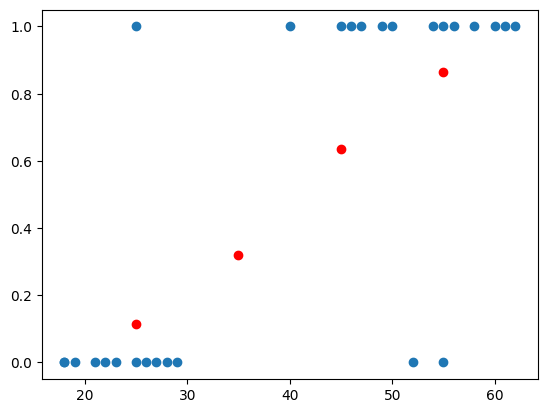

In [27]:
plt.scatter(df.edad,
           df.compra)
plt.scatter(datos_nuevos["edad"],
           prob_compra,
           color="red");

In [28]:
#Arboles de Decision

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [30]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [32]:
X = df.drop("species", axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
le = LabelEncoder()
especies = le.fit_transform(df["species"])
especies

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
y = especies

In [35]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X,
                                                           y,
                                                           train_size=0.8,
                                                           random_state=42)

In [36]:
arbol = DecisionTreeClassifier()

In [37]:
arbol.fit(X_entrena, y_entrena)

DecisionTreeClassifier()

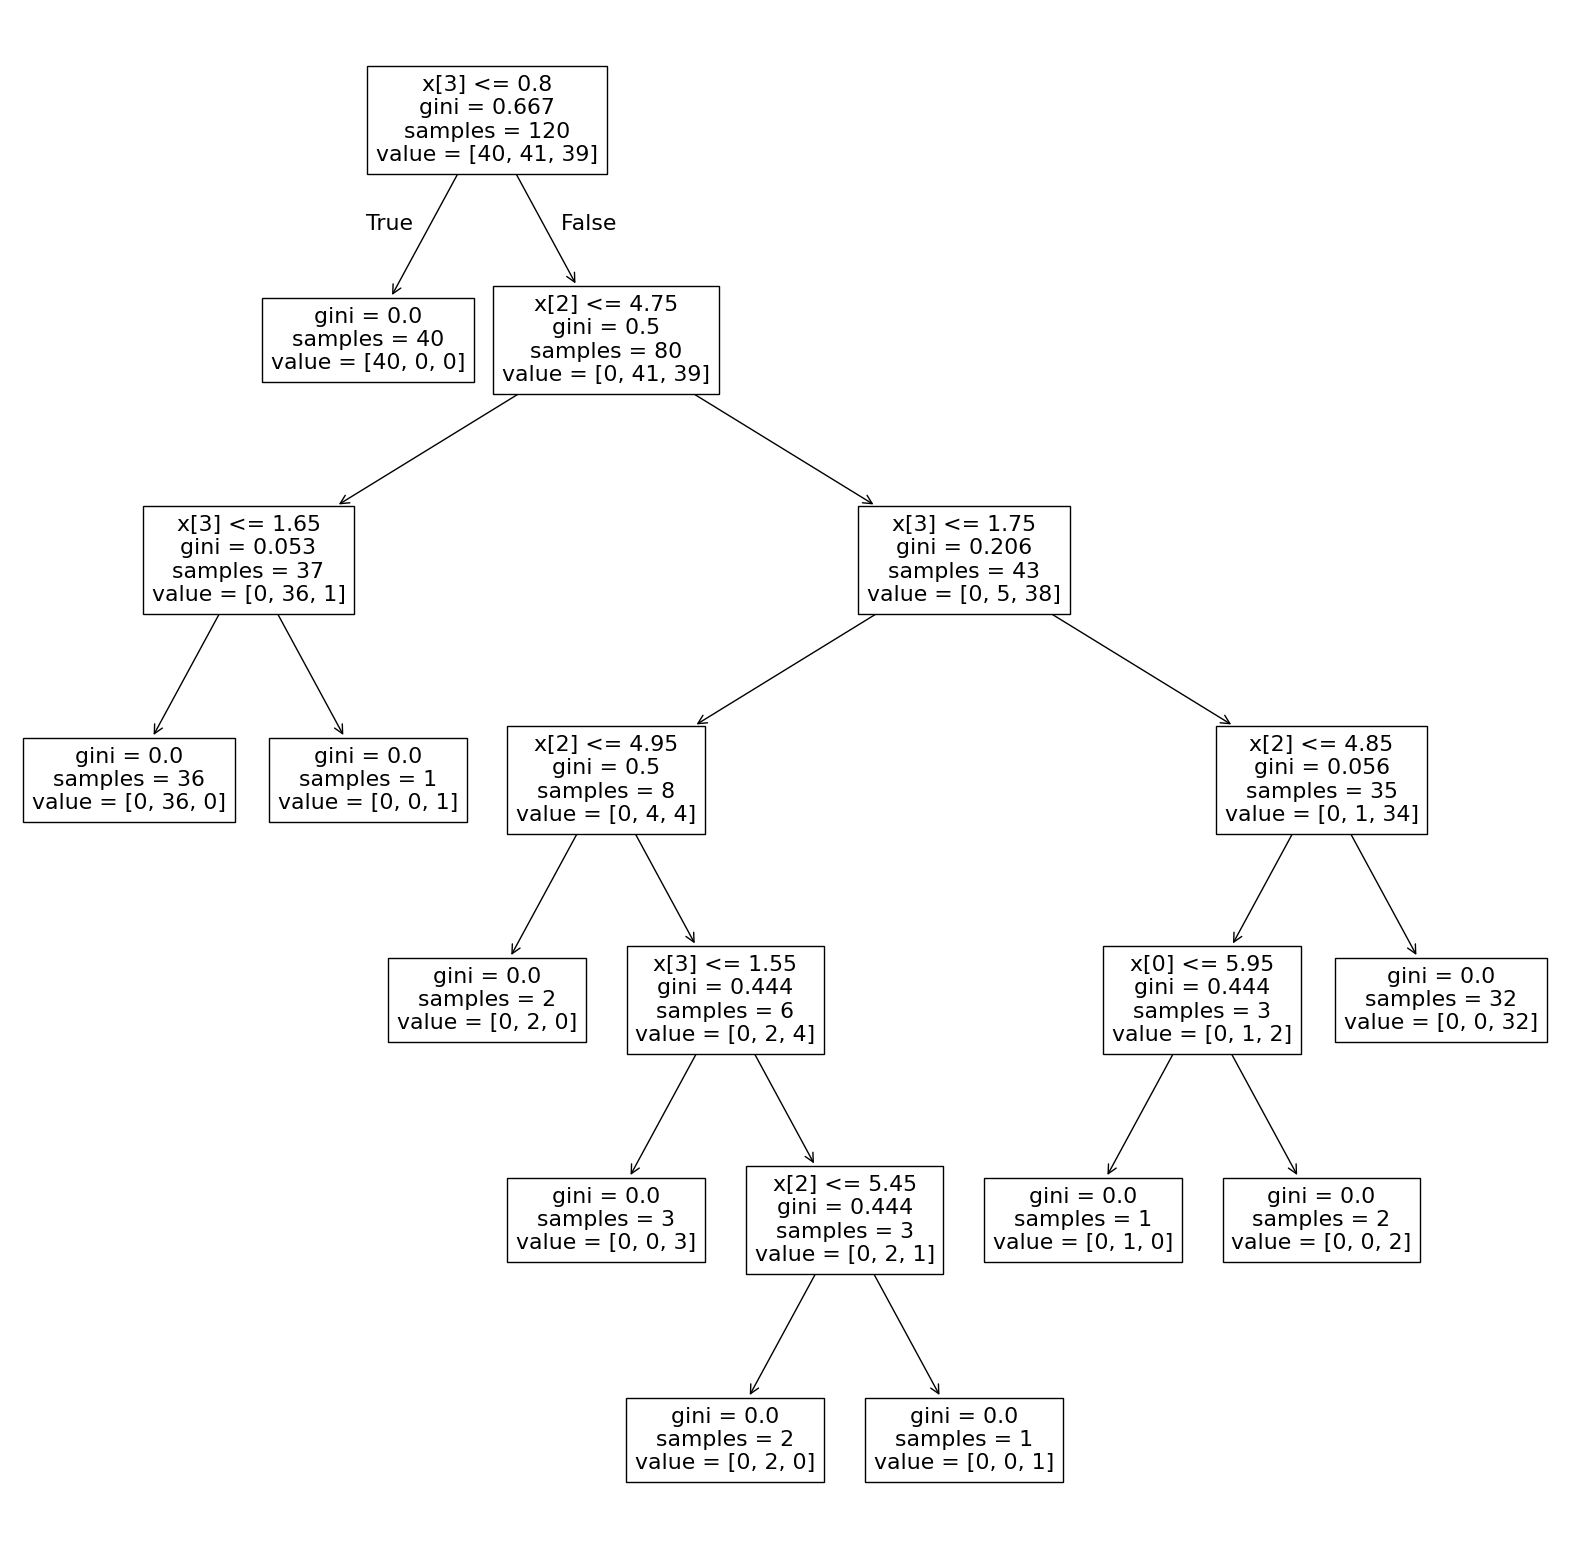

In [38]:
plt.figure(figsize=(20, 20))
plot_tree(decision_tree=arbol);

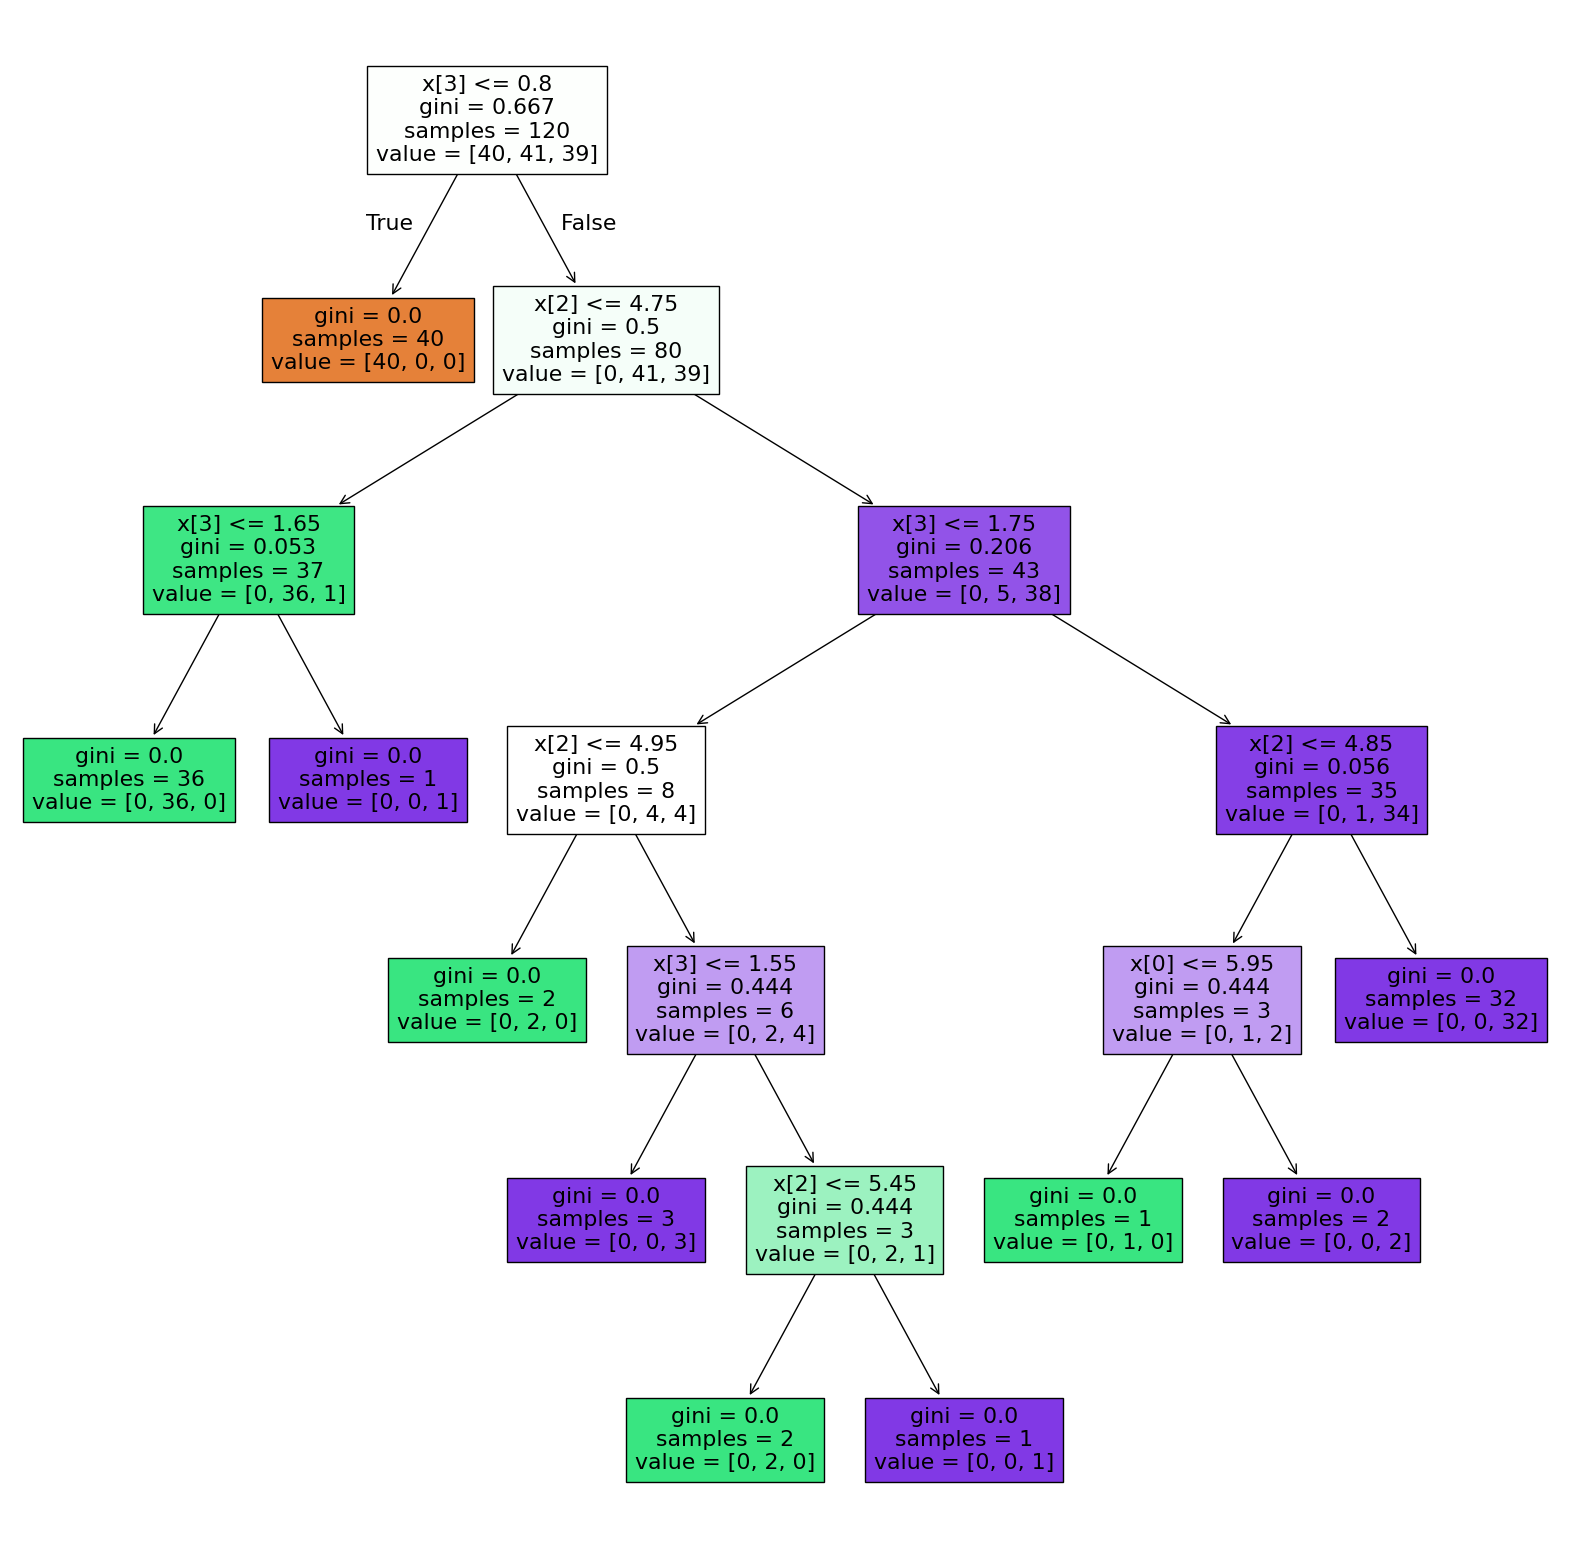

In [39]:
plt.figure(figsize=(20, 20))
plot_tree(decision_tree=arbol,
         filled=True);

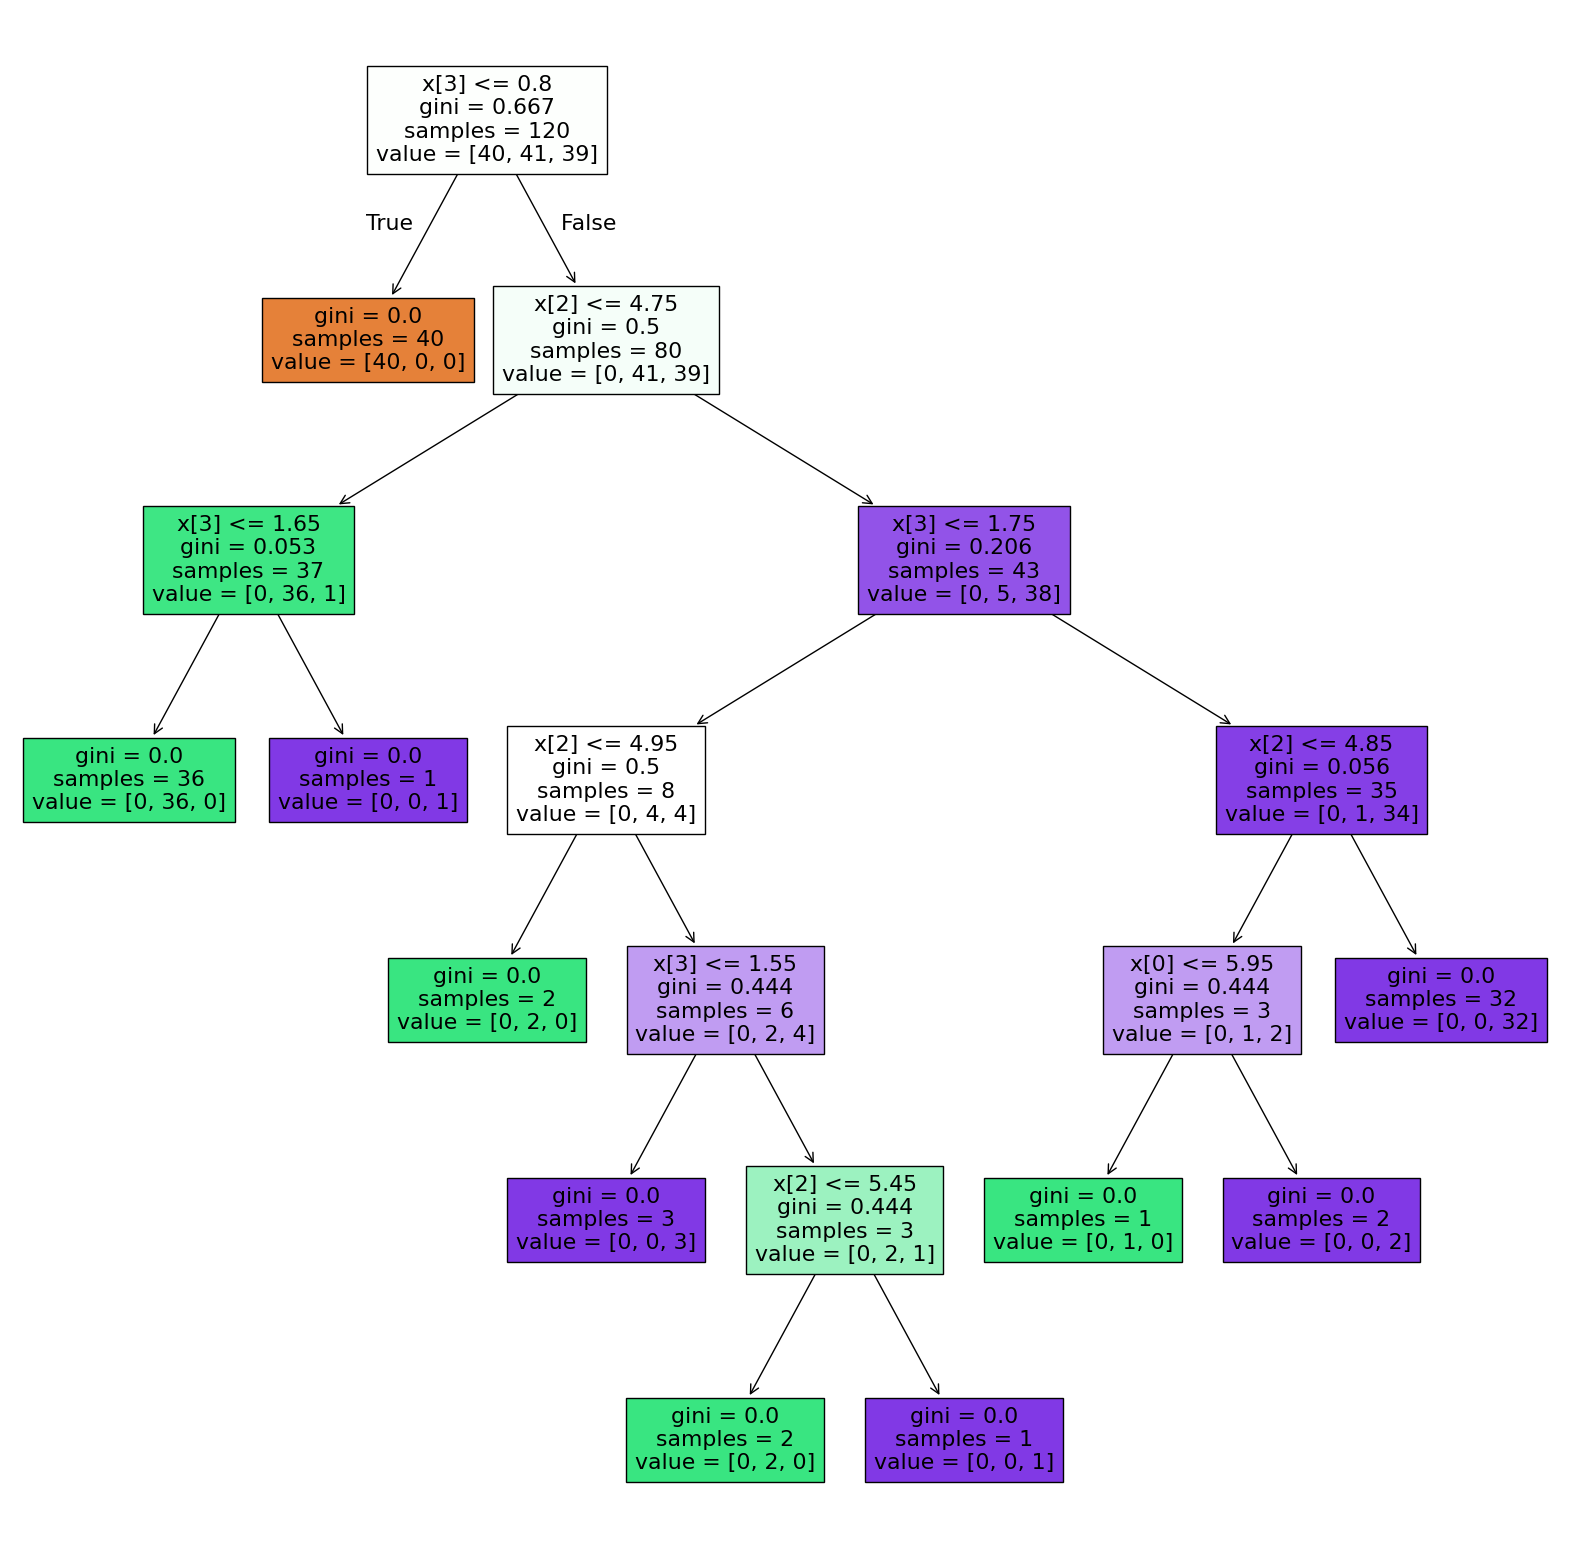

In [40]:
plt.figure(figsize=(20, 20))
plot_tree(decision_tree=arbol,
          filled=True);

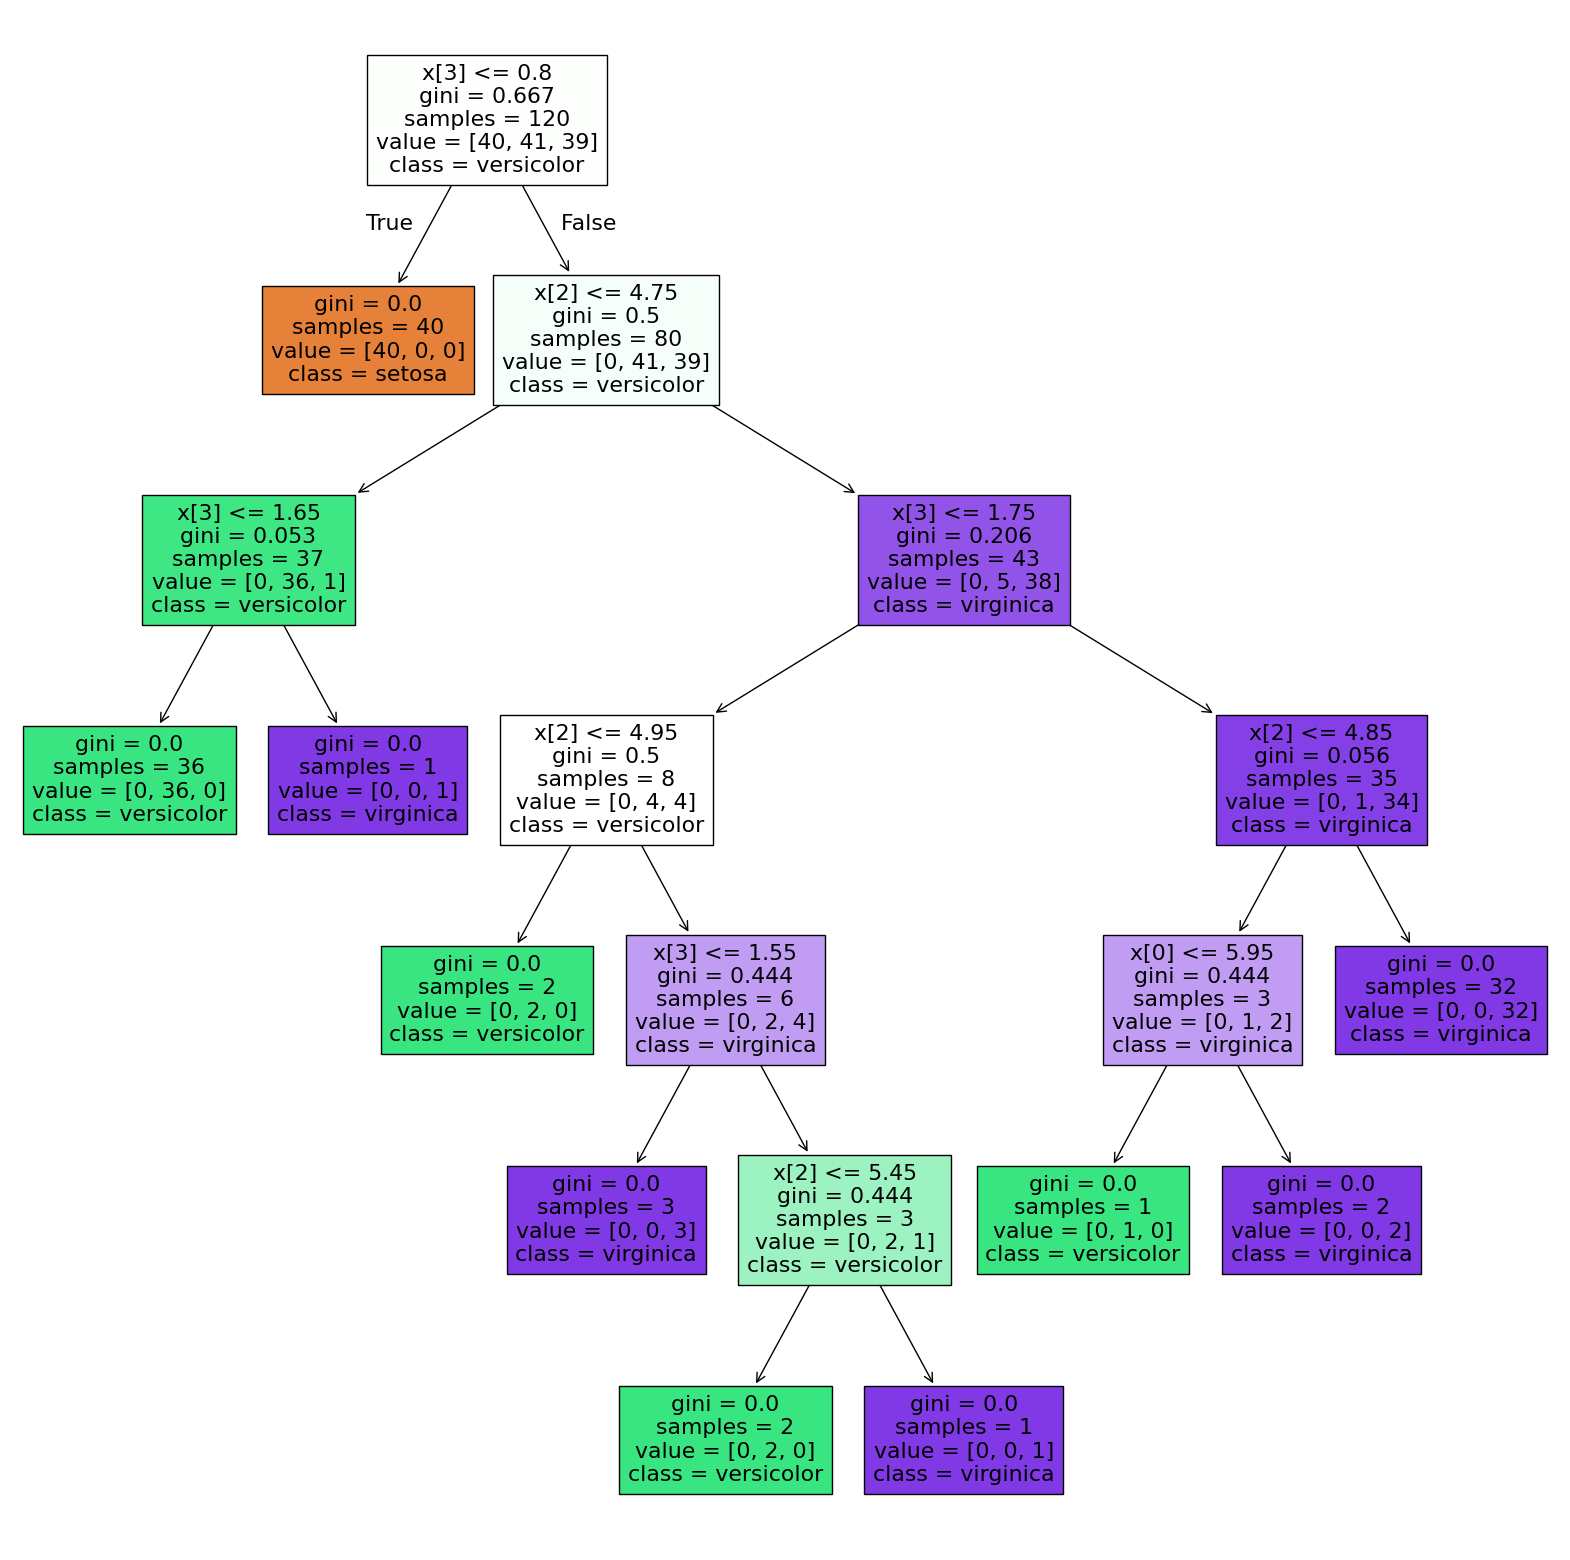

In [41]:
plt.figure(figsize=(20, 20))
plot_tree(decision_tree=arbol,
          class_names=["setosa", "versicolor", "virginica"],
          filled=True);

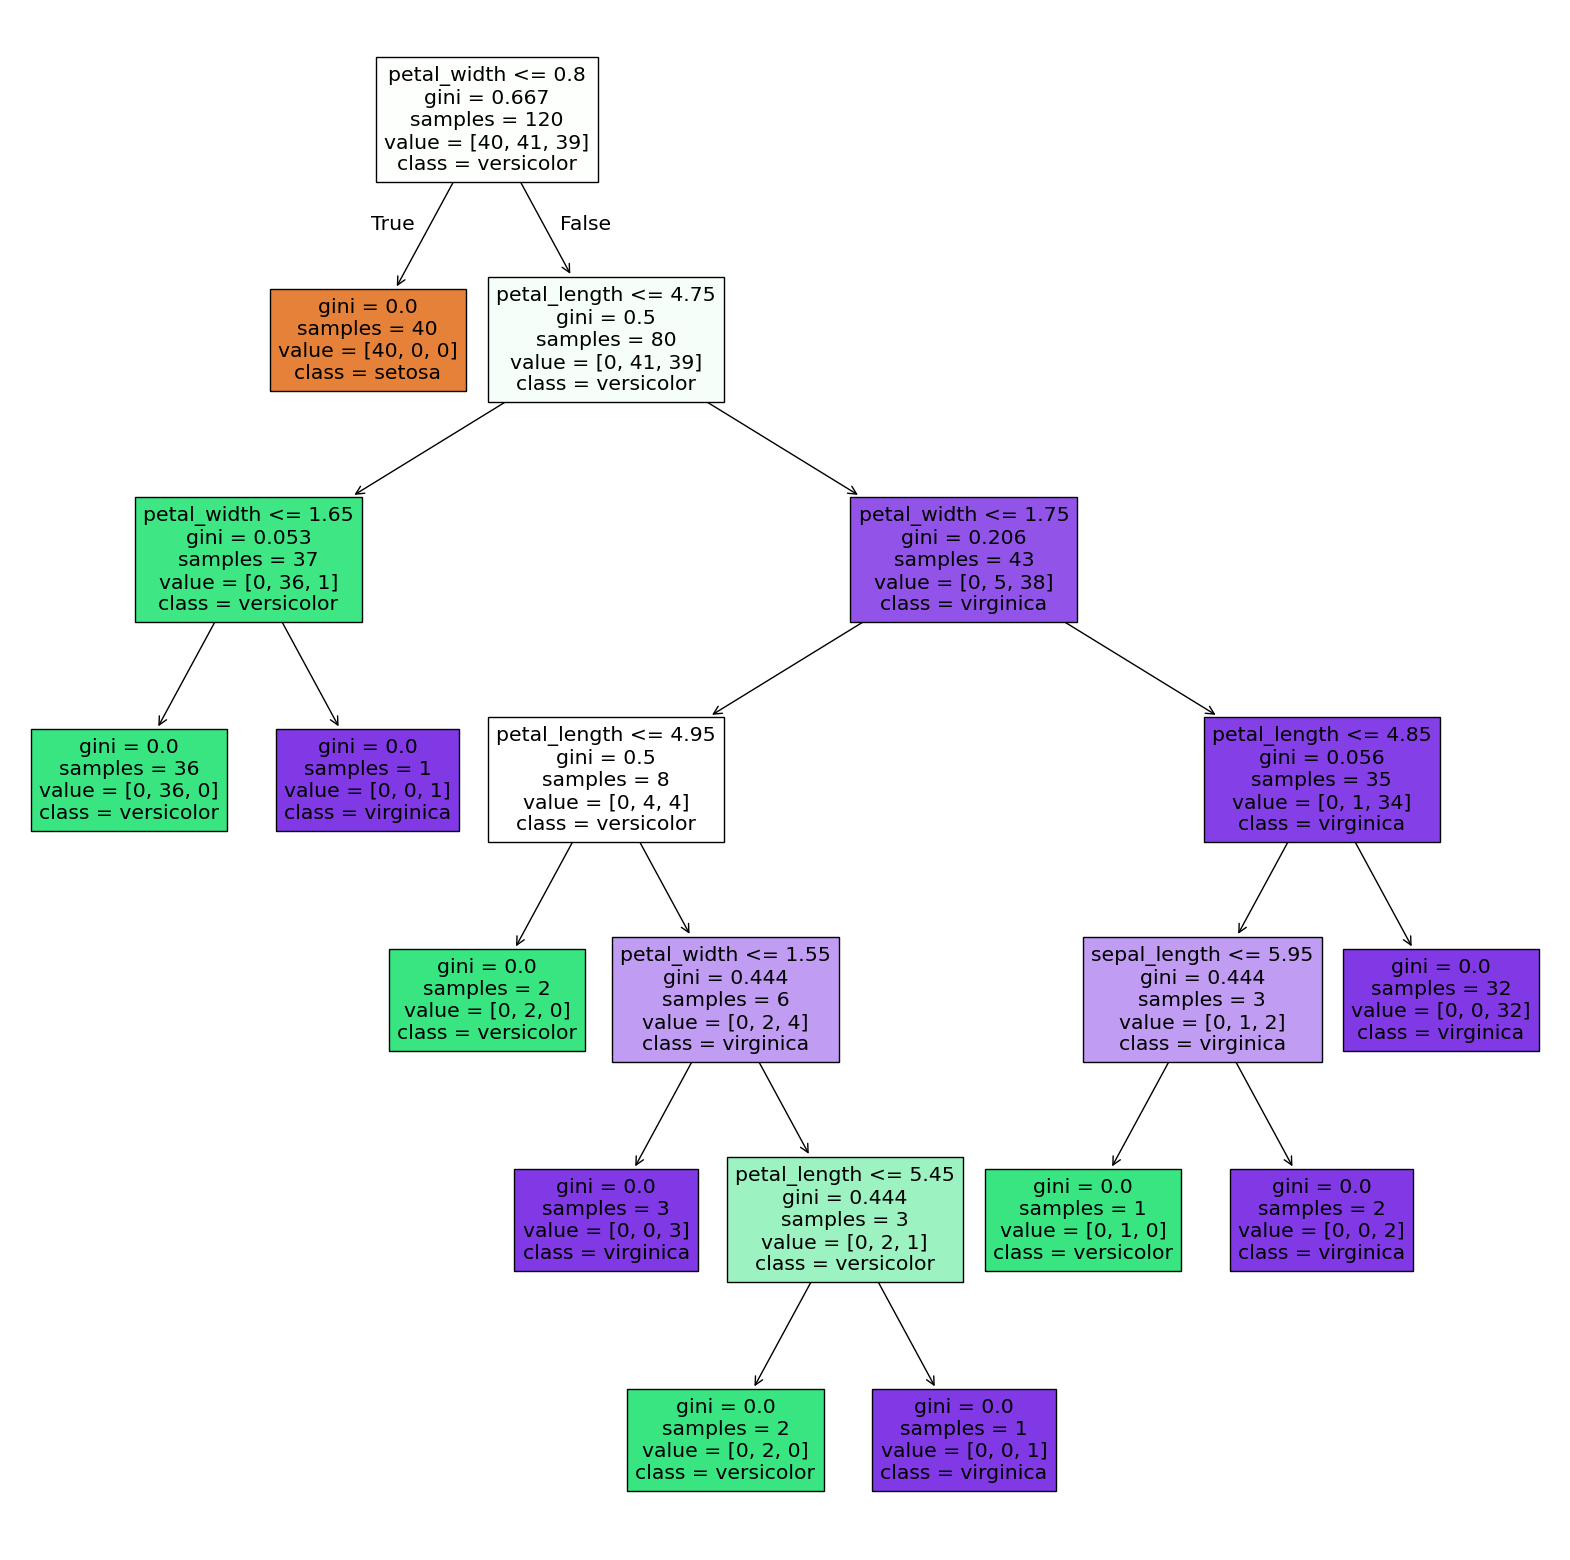

In [42]:
plt.figure(figsize=(20, 20))
plot_tree(decision_tree=arbol,
          class_names=["setosa", "versicolor", "virginica"],
          feature_names = df.columns.to_list(),
          filled=True);

In [43]:
#Bosques Aleatorios

In [44]:
# Librerías conocidas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Librerías nuevas
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [45]:
ruta = "/content/datos_seguro.csv"
df = pd.read_csv(ruta)
df.head()

,edad,compra
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [49]:
escala = MinMaxScaler(feature_range=(0, 1))
normado = escala.fit_transform(df)
df_normado = pd.DataFrame(data=normado, columns=df.columns)
df_normado.head()

,edad,compra
0,0.090909,0.0
1,0.159091,0.0
2,0.659091,1.0
3,0.772727,0.0
4,0.636364,1.0


In [51]:
X = df_normado.drop("compra", axis=1)

In [52]:
y = df_normado["compra"]

In [53]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
modelo_bosque = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_bosque.fit(X_entrena, y_entrena)

RandomForestClassifier(random_state=42)

In [55]:
score_entrena = modelo_bosque.score(X_entrena, y_entrena)
score_prueba = modelo_bosque.score(X_prueba, y_prueba)

print(f"Precisión en el conjunto de entrenamiento: {score_entrena}")
print(f"Precisión en el conjunto de prueba: {score_prueba}")

Precisión en el conjunto de entrenamiento: 0.9047619047619048
Precisión en el conjunto de prueba: 1.0


The model has been trained and evaluated. You can now use the `modelo_bosque` to make predictions on new data.

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# algoritmos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [60]:
ruta = "/content/tarjetas_credito.csv"
df = pd.read_csv(ruta)
df.head()

,Duracion,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Monto,Clase
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [61]:
escala = MinMaxScaler(feature_range=(0, 1))
normado = escala.fit_transform(df)
df_normado = pd.DataFrame(data=normado, columns=df.columns)
df_normado.head()

,Duracion,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Monto,Clase
0,0.000000,0.943114,0.792888,0.841021,0.299283,0.543337,0.546786,0.467614,0.786444,0.387787,...,0.561184,0.522992,0.700467,0.423693,0.658202,0.387532,0.653816,0.256589,0.007612,0.0
1,0.000000,0.986831,0.796587,0.785989,0.256794,0.548514,0.535598,0.462962,0.786298,0.362898,...,0.557840,0.480237,0.703785,0.364336,0.660641,0.439585,0.649710,0.257374,0.000137,0.0
2,0.000013,0.943139,0.779055,0.823300,0.253671,0.541195,0.574268,0.475677,0.788042,0.312283,...,0.565477,0.546030,0.716450,0.313345,0.629397,0.395797,0.648375,0.255739,0.019264,0.0
3,0.000013,0.949857,0.791661,0.823759,0.196879,0.547600,0.562904,0.467585,0.789434,0.317413,...,0.559734,0.510277,0.699216,0.242384,0.690963,0.382109,0.651776,0.258400,0.006283,0.0
4,0.000026,0.946568,0.803263,0.818086,0.254733,0.542442,0.539259,0.472777,0.782484,0.406033,...,0.561327,0.547271,0.700044,0.434541,0.637077,0.501782,0.656289,0.261773,0.003561,0.0


In [62]:
X = df_normado.drop("Clase", axis=1)

In [63]:
y = df_normado["Clase"]

In [64]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.7, random_state=42)

In [65]:
modelos = [
    ("Regresión Logística", LogisticRegression()),
    ("Arbol de Decisión", DecisionTreeClassifier()),
    ("Bosque Aleatorio", RandomForestClassifier())
]

In [67]:
# Drop rows with missing values before training
X_entrena_cleaned = X_entrena.dropna()
y_entrena_cleaned = y_entrena[X_entrena_cleaned.index]

for nombre, modelo in modelos:
    modelo.fit(X_entrena_cleaned, y_entrena_cleaned)
    puntaje = modelo.score(X_prueba, y_prueba)
    print(f'{nombre}: {puntaje:.4f}')

Regresión Logística: 0.9986
Arbol de Decisión: 0.9989
Bosque Aleatorio: 0.9993


In [68]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [69]:
# Definir la ruta del dataset
ruta = "/content/Ventas.csv"
# Cargar el dataset
df = pd.read_csv(ruta)
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [71]:
# Convertir la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [72]:
escala = MinMaxScaler(feature_range=(0, 1))

# Eliminamos las columnas no deseadas y guardamos los nombres de las columnas que vamos a escalar
columnas_para_escalar = df.drop(["Ventas", "Fecha"], axis=1).columns

# Ajustamos el MinMaxScaler a las columnas restantes y transformamos los datos
normado = escala.fit_transform(df[columnas_para_escalar])

# Creamos un nuevo DataFrame con los datos normalizados y las columnas correctas
df_normado = pd.DataFrame(data=normado, columns=columnas_para_escalar)

# Si necesitas, puedes agregar las columnas no escaladas que has quitado previamente
df_normado["Ventas"] = df["Ventas"]
df_normado["Fecha"] = df["Fecha"]

# Ahora df_normado tiene los datos normalizados y las columnas no normalizadas originales
df_normado.head()

,DíaDeLaSemana,Promociones,Festivo,Ventas,Fecha
0,0.833333,0.0,0.0,4033,2022-01-01
1,1.000000,0.0,1.0,4012,2022-01-02
2,0.000000,0.0,0.0,1608,2022-01-03
3,0.166667,1.0,0.0,2046,2022-01-04
4,0.333333,0.0,0.0,2484,2022-01-05


In [73]:
# Comprobación del tipo de dato de Fecha
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          365 non-null    datetime64[ns]
 1   DíaDeLaSemana  365 non-null    int64         
 2   Promociones    365 non-null    int64         
 3   Festivo        365 non-null    int64         
 4   Ventas         365 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 14.4 KB


In [74]:
# Identificar las variables dependientes e independientes
X = df_normado.drop(['Ventas', 'Fecha'], axis=1)
y = df['Ventas']

In [75]:
# Dividir en conjuntos de entrenamiento y prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.8, random_state=42)

In [76]:
# Estadísticas descriptivas
df.describe()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,4.005479,0.200000,0.142466,2997.219178
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,1305.000000
25%,2022-04-02 00:00:00,2.000000,0.000000,0.000000,2195.000000
50%,2022-07-02 00:00:00,4.000000,0.000000,0.000000,3074.000000
75%,2022-10-01 00:00:00,6.000000,0.000000,0.000000,3979.000000
max,2022-12-31 00:00:00,7.000000,1.000000,1.000000,4404.000000
std,NaN,2.002738,0.400549,0.350007,942.096284


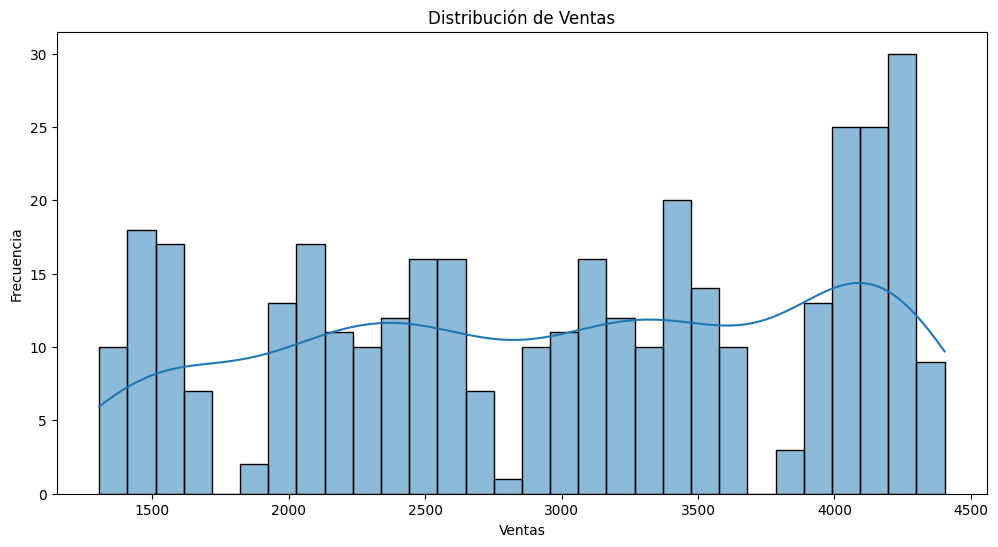

In [77]:
# Visualización de la distribución de ventas
plt.figure(figsize=(12, 6))
sns.histplot(df['Ventas'], bins=30, kde=True)
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia');

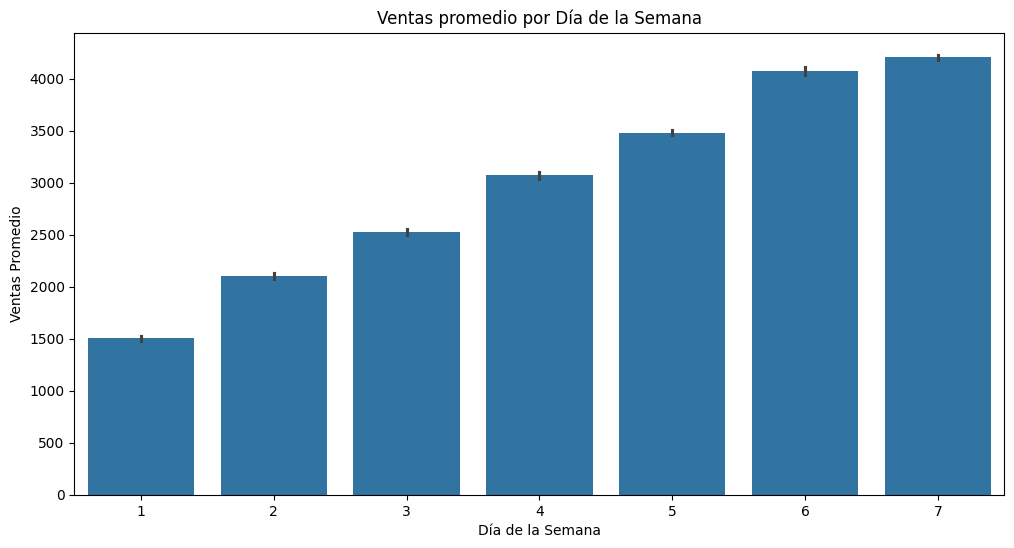

In [78]:
# Relación entre ventas y día de la semana con promedio de ventas
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='DíaDeLaSemana', y='Ventas')
plt.title('Ventas promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Promedio');

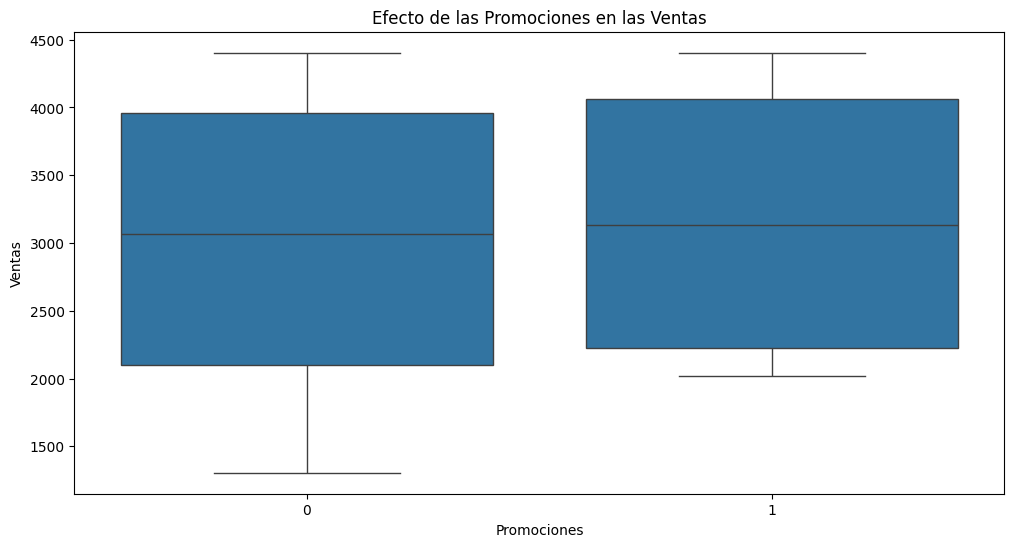

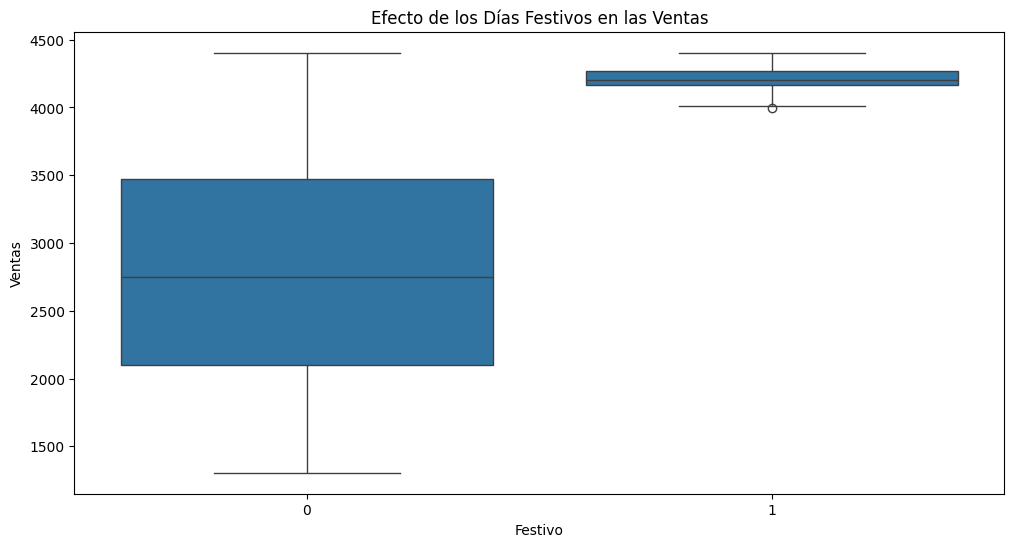

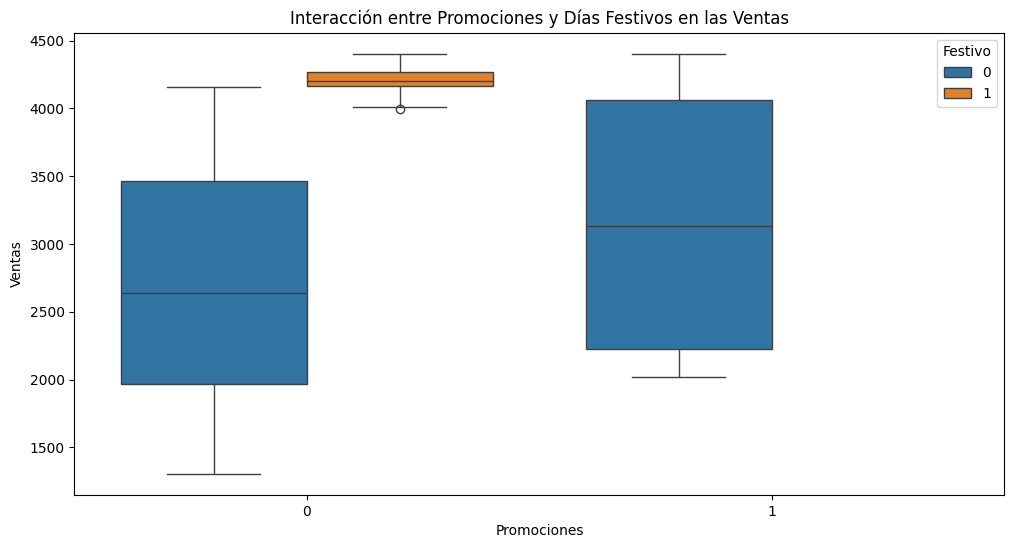

In [79]:
# boxplot para comparar las ventas con y sin promociones.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promociones', y='Ventas', data=df)
plt.title('Efecto de las Promociones en las Ventas')

# boxplot para comparar las ventas para los días normales y festivos.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Festivo', y='Ventas', data=df)
plt.title('Efecto de los Días Festivos en las Ventas')

# boxplot para ver la interacción entre promociones y días festivos en las ventas.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promociones', y='Ventas', hue='Festivo', data=df)
plt.title('Interacción entre Promociones y Días Festivos en las Ventas');

In [80]:
# almacenar modelos
modelos = [
    ("modelo lineal", LinearRegression()),
    ("modelo arbol", DecisionTreeRegressor(random_state=42)),
    ("modelo bosque", RandomForestRegressor(random_state=42))
]

In [81]:
# Entrenar modelos y mostrar puntajes
for nombre, modelo in modelos:
    modelo.fit(X_entrena, y_entrena)
    puntaje = modelo.score(X_prueba, y_prueba)
    print(f'{nombre}: {puntaje}')

modelo lineal: 0.9924245101323563
modelo arbol: 0.9923508015371342
modelo bosque: 0.9923097376813321


In [82]:
# Alojamos el modelo de Regresión Lineal en una variable
modelo_lineal = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
modelo_lineal.fit(X_entrena, y_entrena)

# Realizamos predicciones usando el conjunto de prueba
predicciones_lineal = modelo_lineal.predict(X_prueba)

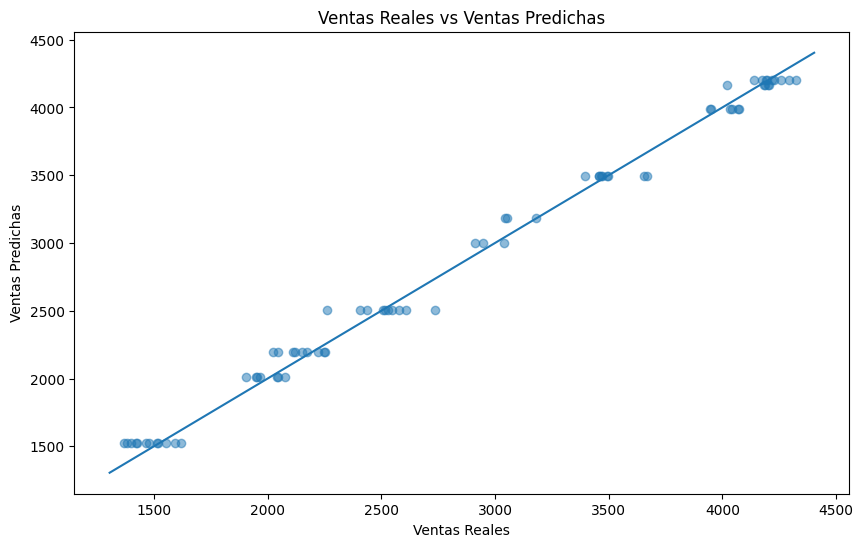

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(y_prueba, predicciones_lineal, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.title('Ventas Reales vs Ventas Predichas');

In [84]:
df_test = pd.DataFrame({'Real': y_prueba, 'Predicho': predicciones_lineal})
df_test = df_test.sort_index()

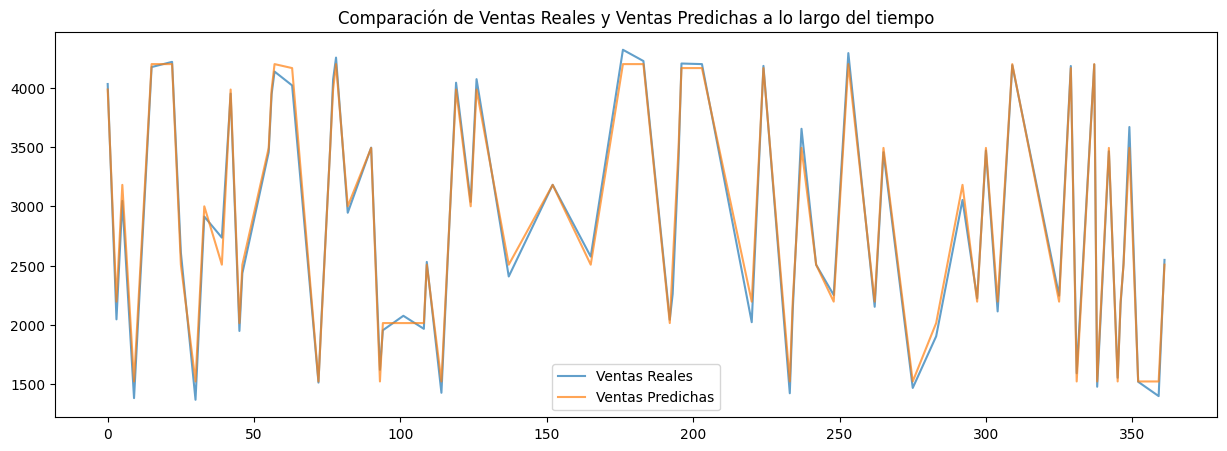

In [85]:
plt.figure(figsize=(15, 5))
plt.plot(df_test['Real'], label='Ventas Reales', alpha=0.7)
plt.plot(df_test['Predicho'], label='Ventas Predichas', alpha=0.7)
plt.legend()
plt.title('Comparación de Ventas Reales y Ventas Predichas a lo largo del tiempo');